# `Binary classification on toy dataset`

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_circles

device = "cuda" if torch.cuda.is_available() else "cpu" # device agnostic code, for CPU / GPU

In [2]:
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


**Visualizing the Dataset**

In [3]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


**So the pandas framework doesn't really tell us anything useful about the dataset. Now we plot it to hopefully find something useful**

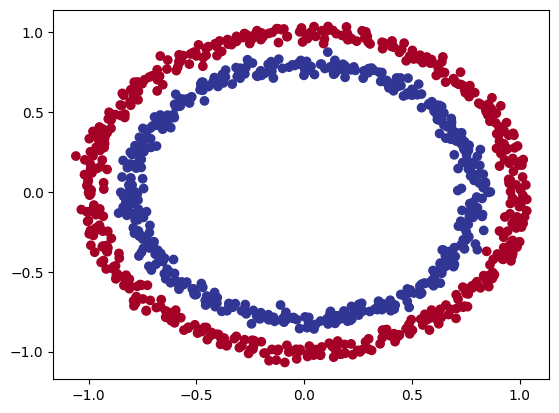

In [4]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**So its a classification problem, of two circles**

In [5]:
X = torch.from_numpy(X).type(torch.float) #converting to tensors
y = torch.from_numpy(y).type(torch.float)

In [6]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,     #dividing data into train and test split
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

**Making a linear model**

In [9]:
class ClassificationModel(nn.Module):
  def __init__(self):
    super().__init__()
    #creating linear layers
    self.layer_1= nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = ClassificationModel().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.4923, -0.2774],
                      [-0.3767,  0.0090],
                      [ 0.3884,  0.5922],
                      [ 0.3729, -0.1231],
                      [-0.7057, -0.6016]])),
             ('layer_1.bias',
              tensor([ 0.6748,  0.6977, -0.0748, -0.3013, -0.2044])),
             ('layer_2.weight',
              tensor([[-0.3824,  0.2576,  0.0700,  0.0473,  0.0747]])),
             ('layer_2.bias', tensor([0.0786]))])

**Defining loss and optimizer**

In [10]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


**Accuracy funtion**

In [11]:
def accuracy_fn (y_true, y_preds):
  correct = torch.eq(y_true, y_preds).sum().item()
  acc = (correct/len(y_preds))*100
  return acc

**Training Loop**

In [12]:
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test =  X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_preds=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_preds= test_pred)
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}| Acc: {acc:.2f}% | Test loss: {test_loss:.3f} | Test Acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 0.69343| Acc: 49.00% | Test loss: 0.697 | Test Acc: 47.50%
Epoch: 100 | Loss: 0.69319| Acc: 50.38% | Test loss: 0.696 | Test Acc: 46.00%
Epoch: 200 | Loss: 0.69310| Acc: 50.50% | Test loss: 0.696 | Test Acc: 46.50%
Epoch: 300 | Loss: 0.69305| Acc: 50.75% | Test loss: 0.696 | Test Acc: 45.50%
Epoch: 400 | Loss: 0.69303| Acc: 51.12% | Test loss: 0.696 | Test Acc: 46.50%
Epoch: 500 | Loss: 0.69301| Acc: 51.25% | Test loss: 0.695 | Test Acc: 46.00%
Epoch: 600 | Loss: 0.69300| Acc: 51.50% | Test loss: 0.695 | Test Acc: 45.50%
Epoch: 700 | Loss: 0.69300| Acc: 51.38% | Test loss: 0.695 | Test Acc: 46.00%
Epoch: 800 | Loss: 0.69299| Acc: 51.12% | Test loss: 0.695 | Test Acc: 46.00%
Epoch: 900 | Loss: 0.69299| Acc: 51.50% | Test loss: 0.695 | Test Acc: 45.50%


**Importing a helper function**

In [13]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("file exists, no download")
else:
  print("downloadinf helper function")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

downloadinf helper function


**Seeing the predictions**

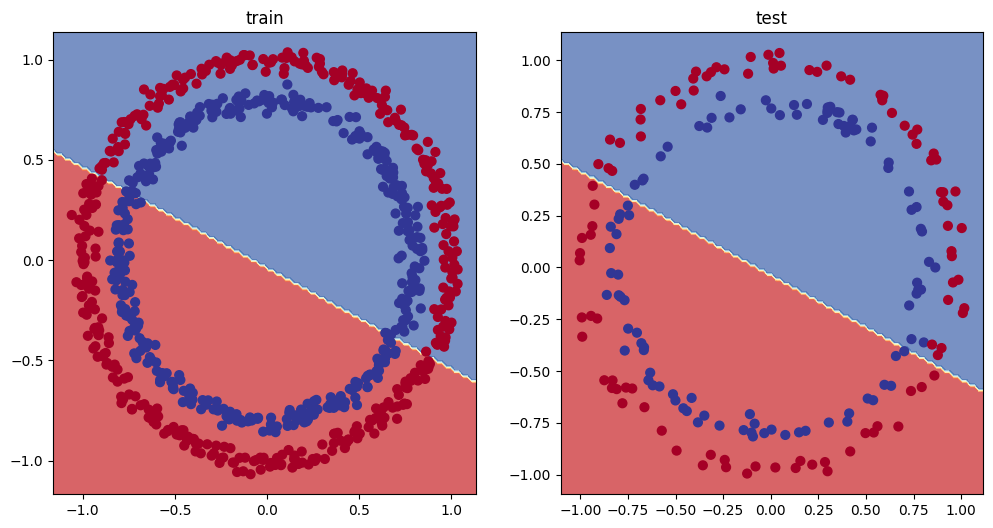

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

**Hmmmm**

---


So baically the model does nothing right now, it only knows lines, because of the linear layers, we need curves, so let's change some hyper parameters

In [15]:
#changing hyperparameters
class BinaryProblem_V2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=128)
    self.layer3 = nn.Linear(in_features=128, out_features=10)
    self.layer4 = nn.Linear(in_features=10, out_features=10)
    self.relu = nn.ReLU()
    self.layer5 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer5(self.relu(self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.layer1(x))))))))

model_3 = BinaryProblem_V2().to(device)


In [16]:
loss_fn_v2 = nn.BCEWithLogitsLoss()
optimizer_v2 = torch.optim.SGD(params=model_3.parameters(),
                               lr = 0.1)

In [17]:
epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logit = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logit))

  loss = loss_fn_v2(y_logit, y_train)
  acc = accuracy_fn(y_true=y_train, y_preds=y_pred)

  optimizer_v2.zero_grad()

  loss.backward()

  optimizer_v2.step()

  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_preds= test_pred)
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}| Acc: {acc:.2f}% | Test loss: {test_loss:.3f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70618| Acc: 50.00% | Test loss: 0.705 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69133| Acc: 68.00% | Test loss: 0.692 | Test Acc: 60.50%
Epoch: 200 | Loss: 0.68945| Acc: 61.38% | Test loss: 0.690 | Test Acc: 53.50%
Epoch: 300 | Loss: 0.68537| Acc: 61.88% | Test loss: 0.687 | Test Acc: 58.00%
Epoch: 400 | Loss: 0.67401| Acc: 62.12% | Test loss: 0.677 | Test Acc: 62.00%
Epoch: 500 | Loss: 0.63177| Acc: 70.88% | Test loss: 0.639 | Test Acc: 68.50%
Epoch: 600 | Loss: 0.53148| Acc: 54.37% | Test loss: 0.555 | Test Acc: 54.50%
Epoch: 700 | Loss: 0.45446| Acc: 62.62% | Test loss: 0.495 | Test Acc: 63.50%
Epoch: 800 | Loss: 0.39462| Acc: 73.88% | Test loss: 0.438 | Test Acc: 70.00%
Epoch: 900 | Loss: 0.04544| Acc: 100.00% | Test loss: 0.070 | Test Acc: 100.00%


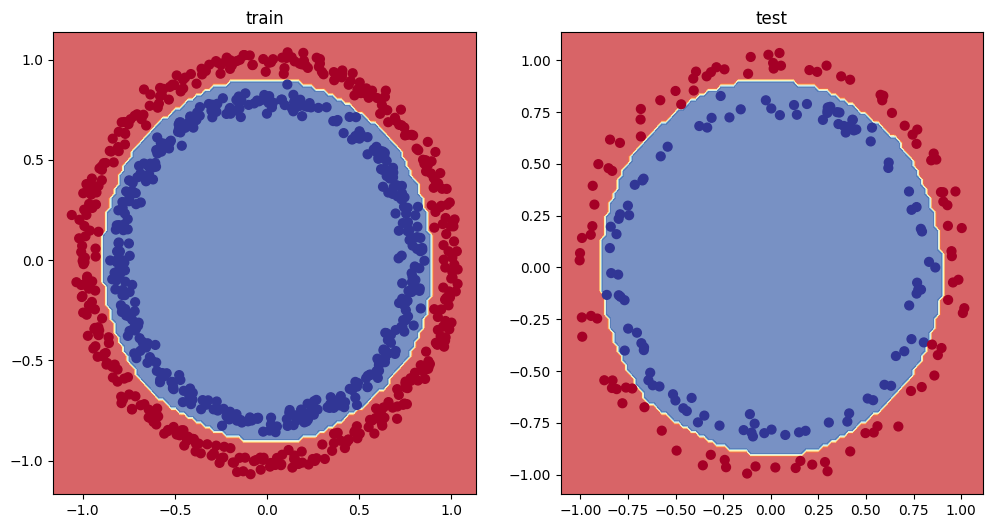

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3, X_test, y_test)

**YESS!!**

---


Now the model knows how to curve due to the ReLU activation, it can solve more complex problems!